# Random Forest Regression Model Prediction

#            

   The necesarily libries:

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import missingno as msno
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('encoded2.csv')

In [3]:
data

,car_name,year,mileage,fuel_type,seller_type,transmission_type,previous_owners,selling_price
0,84,2014.0,27000,2,0,1,0,3.35
1,87,2013.0,43000,1,0,1,0,4.75
2,66,2017.0,6900,2,0,1,0,7.25
3,90,2011.0,5200,2,0,1,0,2.85
4,86,2014.0,42450,1,0,1,0,4.60
...,...,...,...,...,...,...,...,...
251,67,2010.0,38000,2,0,1,0,3.25
252,63,2014.0,33019,2,0,1,0,3.75
253,67,2015.0,60076,1,0,1,0,8.55
254,65,2015.0,60000,2,0,1,0,4.00


   Defining the independent variables and dependent variable:

In [4]:
y=data.selling_price
X=data.drop(columns=['selling_price'])

Splitting the dataset into training and testing data:

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1000)

Running and fitting the model:

In [6]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(X_train,
         y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Model Accuracy Score:

In [7]:
RF.score(X_test, y_test)

0.9163421386811971

#### As it shown, the accoracy of the model is 91%

Comparing the predicted and actual values in table and graph:

In [8]:
y_predict= RF.predict(X_test)
df= pd.DataFrame(data={'prediction' : y_predict[:20], 'actual' : y_test[:20]})
df

,prediction,actual
39,5.05650,5.85
103,0.81140,0.75
253,7.44942,8.55
166,0.47260,0.16
80,1.13330,1.20
194,5.66280,6.15
173,7.85400,5.75
223,4.19400,4.00
96,0.99530,0.90
207,5.18800,5.20


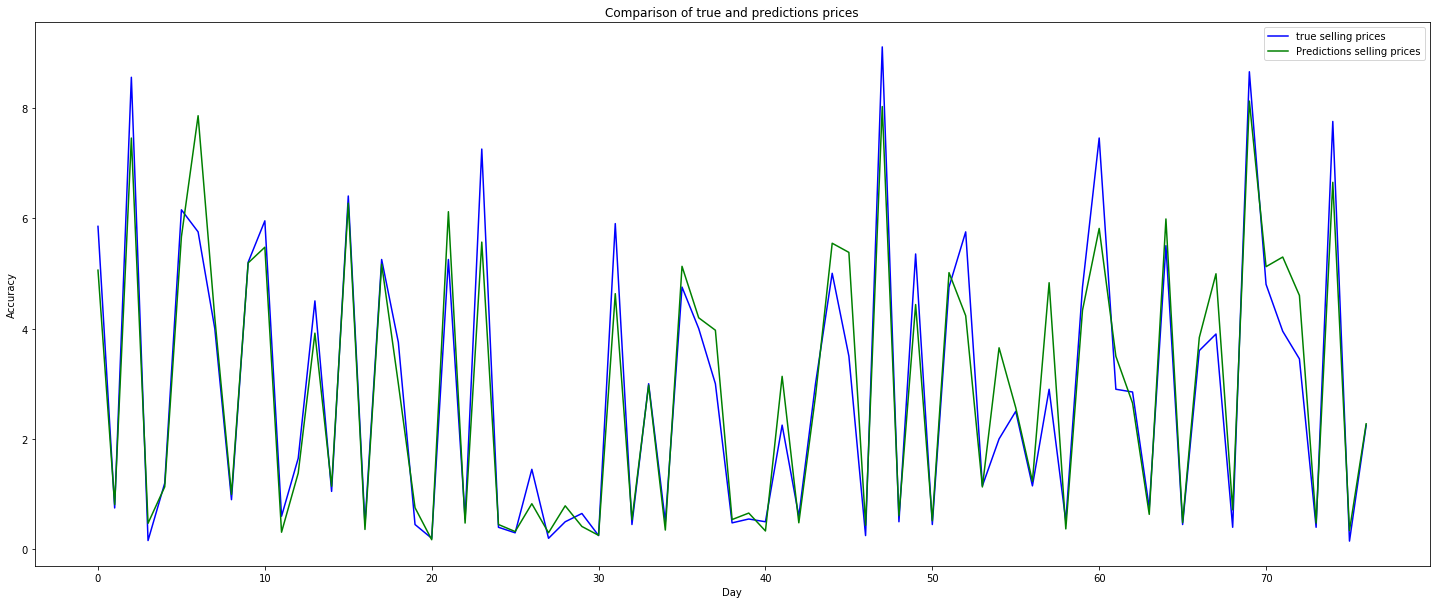

In [9]:
pred=RF.predict(X_test)
a=pd.DataFrame()
a['true_selling_prices']=y_test
a['predicted_selling_prices']=pred

plt.figure(figsize=(25, 10))
plt.subplot(1,1,1)
plt.plot(a.true_selling_prices.values,color='blue',label='true selling prices')
plt.plot(a.predicted_selling_prices.values,color='green',label='Predictions selling prices')

plt.title('Comparison of true and predictions prices')
plt.xlabel('Day')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()